<a href="https://colab.research.google.com/github/rahutch6/MAT241-HUTCHINS/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NUMERICAL DIFFERENTIATION**

* used to model changes in functions
* want to derive numerical differentiation schemes and accuracy

NUMERICAL GRID: evenly spaced set of points over domain of a function over some interval

SPACING/STEP SIZE: distance between adjacent points on the grid

* in python, function f(x) represented over an interval by computing value on a grid
*discrete/discretized representation useful for numerical calculations, since some functions only work with discrete points

FORWARD DIFFERENCE: estimate to the slope of xj using line that connects point to the next point to the right

BACKWARD DIFFERENCE: estimate slope of function of xj using line that connects point to next left point

CENTRAL DIFFERENCE: connects points on right and left of xj

* forward difference is O(h)
* central difference is O(h^2)


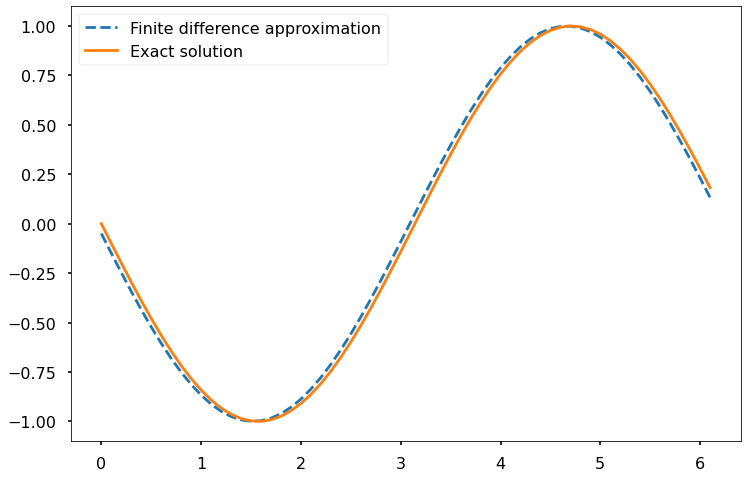

0.049984407218554114


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~
#numerical differentiation 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
h = 0.1 #step size
x = np.arange(0, 2*np.pi, h) # define grid

y = np.cos(x) # function


forward_diff = np.diff(y)/h # vector of forward differences

x_diff = x[:-1:] # corresponding grid

exact_solution = -np.sin(x_diff) # exact solution

plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# max error between numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

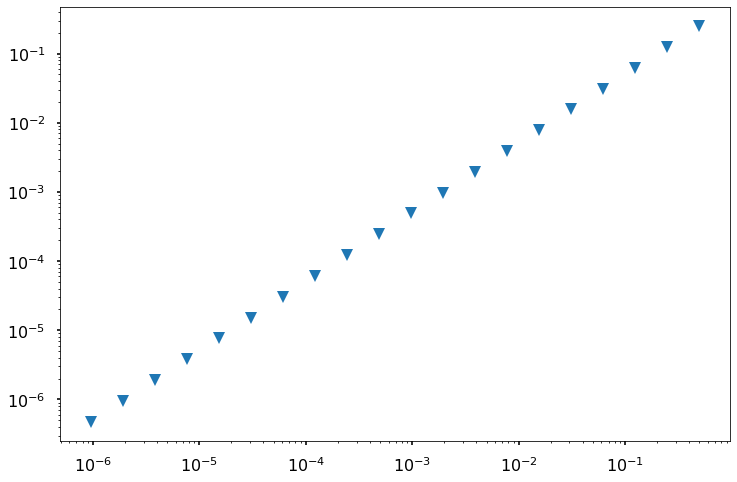

In [4]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forward difference for decreasing step sizes
h = 1# step size

iterations = 20 # number of iterations to perform

step_size = [] # step sizes
max_error = [] # max error for each step size

for i in range(iterations):
    h /= 2 
    step_size.append(h) 
    x = np.arange(0, 2 * np.pi, h)     # new grid
    y = np.cos(x)     # function value at grid
    forward_diff = np.diff(y)/h     # vector of forward differences
    x_diff = x[:-1]     # corresponding grid
    exact_solution = -np.sin(x_diff)     # exact solution
    
    # max error between numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()


**APPROXIMATING HIGHER ORDER DERIVATIVES**

using Taylor series to approx. derivatives of higher orders
* compute using f(x(j-1)), and f(x(j+1)), then add them together
*O(h^2)


**NUMERICAL DIFFERENTIATION WITH NOISE**

NOISE: value off by smal lamount from what it would be if computed from purely mathematically



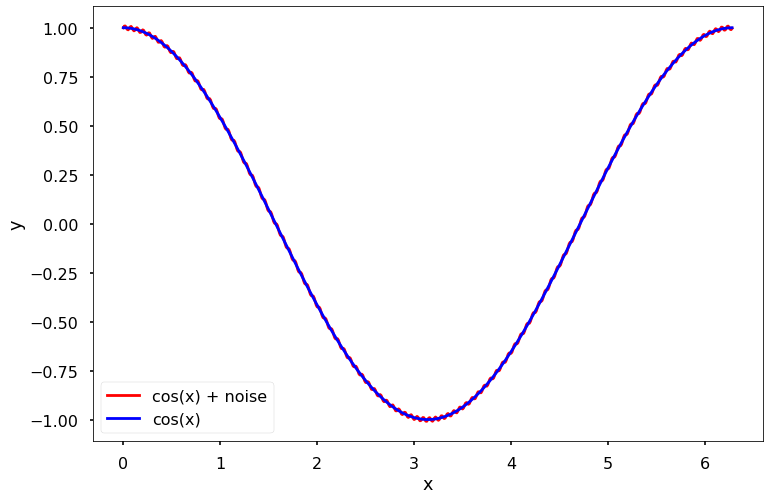

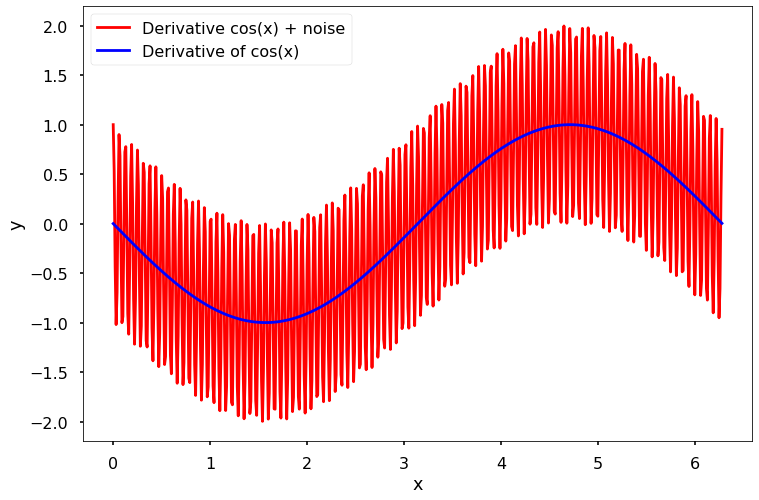

In [3]:
# derivative with noise, when E small and w large
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline
x = np.arange(0, 2*np.pi, 0.01) 
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x) 
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#with noise, when ew not small
x = np.arange(0, 2*np.pi, 0.01) 
# compute function
y = -np.sin(x) 
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()